# Question 1: Oregon Wildfires

In [15]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Define data filepath
pathname = '/Users/lily/Documents/GitHub/geospatial-data-science/labs/lab2/lab2_data/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [4]:
# Find column labels
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [6]:
# Find columns datatypes
df.dtypes

OBJECTID       float64
FOD_ID           int64
FPA_ID          object
SOURCE_SYS      object
SOURCE_S_1      object
NWCG_REPOR      object
NWCG_REP_1      object
NWCG_REP_2      object
SOURCE_REP      object
SOURCE_R_1      object
LOCAL_FIRE      object
LOCAL_INCI      object
FIRE_CODE       object
FIRE_NAME       object
ICS_209_PL      object
ICS_209__1      object
MTBS_ID         object
MTBS_FIRE_      object
COMPLEX_NA      object
FIRE_YEAR        int64
DISCOVERY_      object
DISCOVER_1       int64
DISCOVER_2      object
NWCG_CAUSE      object
NWCG_GENER      object
NWCG_CAU_1      object
CONT_DATE       object
CONT_DOY       float64
CONT_TIME       object
FIRE_SIZE      float64
FIRE_SIZE_      object
LATITUDE       float64
LONGITUDE      float64
OWNER_DESC      object
STATE           object
COUNTY          object
FIPS_CODE       object
FIPS_NAME       object
geometry      geometry
dtype: object

# **Question 1.a**


In [18]:
# answering: Which county had the most human caused wildfires >50 acres?
# Filter for wildfires greater than 50 acres
df_fire50 = df[df['FIRE_SIZE'] > 50]

In [20]:
# Filter for wildfires caused  by humans
df_fire50_human = df_fire50[df_fire50['NWCG_CAUSE'] == "Human"]

In [86]:
#Identify the unique counties in the FIPS_NAME column
counties = df_fire50_human['FIPS_NAME'].unique()
counties

array(['Curry County', None, 'Umatilla County', 'Wallowa County',
       'Morrow County', 'Tillamook County', 'Malheur County',
       'Union County', 'Clatsop County', 'Columbia County',
       'Hood River County', 'Klickitat County', 'Coos County',
       'Washington County', 'Wheeler County', 'Gilliam County',
       'Sherman County', 'Grant County', 'Wasco County',
       'Multnomah County', 'Jefferson County', 'Marion County',
       'Baker County', 'Adams County', 'Clackamas County',
       'Lincoln County', 'Yamhill County', 'Polk County', 'Benton County',
       'Linn County', 'Lane County', 'Crook County', 'Deschutes County',
       'Klamath County', 'Douglas County', 'Harney County', 'Lake County',
       'Jackson County', 'Josephine County'], dtype=object)

In [59]:
# Count the number of items that occur for each county in FIPS_NAME then print the output next to the county name
for i in counties:
    number = df_fire50_human[df_fire50_human['FIPS_NAME'] == i].count()
    print(i, number)

Curry County OBJECTID      9
FOD_ID        9
FPA_ID        9
SOURCE_SYS    9
SOURCE_S_1    9
NWCG_REPOR    9
NWCG_REP_1    9
NWCG_REP_2    9
SOURCE_REP    9
SOURCE_R_1    9
LOCAL_FIRE    6
LOCAL_INCI    8
FIRE_CODE     1
FIRE_NAME     9
ICS_209_PL    0
ICS_209__1    0
MTBS_ID       0
MTBS_FIRE_    0
COMPLEX_NA    0
FIRE_YEAR     9
DISCOVERY_    9
DISCOVER_1    9
DISCOVER_2    3
NWCG_CAUSE    9
NWCG_GENER    9
NWCG_CAU_1    0
CONT_DATE     9
CONT_DOY      9
CONT_TIME     3
FIRE_SIZE     9
FIRE_SIZE_    9
LATITUDE      9
LONGITUDE     9
OWNER_DESC    9
STATE         9
COUNTY        9
FIPS_CODE     9
FIPS_NAME     9
geometry      9
dtype: int64
None OBJECTID      0
FOD_ID        0
FPA_ID        0
SOURCE_SYS    0
SOURCE_S_1    0
NWCG_REPOR    0
NWCG_REP_1    0
NWCG_REP_2    0
SOURCE_REP    0
SOURCE_R_1    0
LOCAL_FIRE    0
LOCAL_INCI    0
FIRE_CODE     0
FIRE_NAME     0
ICS_209_PL    0
ICS_209__1    0
MTBS_ID       0
MTBS_FIRE_    0
COMPLEX_NA    0
FIRE_YEAR     0
DISCOVERY_    0
DISCOVER_

#### After filtering the data for fires larger than 50 acres and caused by humans, the script iterates through the FIPS_NAME data column and counts the number of items within each county. Finally, the forloop prints out each iteration with the county name at the start of each iteration. Scrolling through this output we can see that Wasco County has the highest number of human caused wildfires >50 acres at 71.

# Question 1.b

In [73]:
# answer: Which month had the most natural caused wildfires >100 acres?
# For now, I'm going to use a similar structure to that of 1.a
# Filter for wildfires larger than 100 acres
df_fire100 = df[df['FIRE_SIZE'] > 100]

In [74]:
# Filter for wildfires caused by natural forces
df_fire100_nat = df_fire100[df_fire100['NWCG_CAUSE'] == "Natural"]

In [79]:
# Convert dates from DISCOVERY_ to datetime64 type
datetime = pd.to_datetime(df_fire100_nat['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')

In [80]:
# Add the formatted datetime column to the dataframe
df_fire100_nat['datetime'] = datetime

In [83]:
# Add a new column with just the month of the wildfire indicated
df_fire100_nat['month'] = pd.DatetimeIndex(df_fire100_nat['datetime']).month

In [87]:
# Identify the months in which fires take place
months = df_fire100_nat['month'].unique()
months

array([ 7,  8,  6, 10,  9,  5,  4])

In [88]:
# Count the number of items that occur in each month in 'month' column then print the output next to the month number
for i in months:
    number = df_fire100_nat[df_fire100_nat['month'] == i].count()
    print(i, number)

7 OBJECTID      410
FOD_ID        410
FPA_ID        410
SOURCE_SYS    410
SOURCE_S_1    410
NWCG_REPOR    410
NWCG_REP_1    410
NWCG_REP_2    410
SOURCE_REP    410
SOURCE_R_1    410
LOCAL_FIRE    173
LOCAL_INCI     90
FIRE_CODE     349
FIRE_NAME     410
ICS_209_PL    250
ICS_209__1     35
MTBS_ID       202
MTBS_FIRE_    202
COMPLEX_NA    114
FIRE_YEAR     410
DISCOVERY_    410
DISCOVER_1    410
DISCOVER_2    387
NWCG_CAUSE    410
NWCG_GENER    410
NWCG_CAU_1      0
CONT_DATE     392
CONT_DOY      392
CONT_TIME     370
FIRE_SIZE     410
FIRE_SIZE_    410
LATITUDE      410
LONGITUDE     410
OWNER_DESC    410
STATE         410
COUNTY        284
FIPS_CODE     284
FIPS_NAME     284
geometry      410
datetime      410
month         410
dtype: int64
8 OBJECTID      549
FOD_ID        549
FPA_ID        549
SOURCE_SYS    549
SOURCE_S_1    549
NWCG_REPOR    549
NWCG_REP_1    549
NWCG_REP_2    549
SOURCE_REP    549
SOURCE_R_1    549
LOCAL_FIRE    277
LOCAL_INCI    145
FIRE_CODE     433
FIRE_NAME  

#### After filtering the data for fires larger than 100 acres and caused by natural sources, the script iterates through the months column and counts the number of items within each month. Finally, the forloop prints out each iteration with the month number at the start of each iteration. Scrolling through this output we can see that month 8 (August) has the highest number of natural wildfires >100 acres at 549.

# Question 1.c

In [90]:
# answering: How many fires >200 acres have an undetermined cause (e.g. Missing data/not specified/undetermined?
# Filter for fires >200 acres
df_fire200 = df[df['FIRE_SIZE'] > 200]

In [91]:
df_fire200_unk = df_fire200[df_fire200['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [93]:
# Count the number of items in the filtered dataset
df_fire200_unk.count()

OBJECTID      13
FOD_ID        13
FPA_ID        13
SOURCE_SYS    13
SOURCE_S_1    13
NWCG_REPOR    13
NWCG_REP_1    13
NWCG_REP_2    13
SOURCE_REP    13
SOURCE_R_1    13
LOCAL_FIRE     0
LOCAL_INCI     5
FIRE_CODE      8
FIRE_NAME     13
ICS_209_PL    10
ICS_209__1     0
MTBS_ID        3
MTBS_FIRE_     3
COMPLEX_NA     0
FIRE_YEAR     13
DISCOVERY_    13
DISCOVER_1    13
DISCOVER_2    11
NWCG_CAUSE    13
NWCG_GENER    13
NWCG_CAU_1     0
CONT_DATE      7
CONT_DOY       7
CONT_TIME      6
FIRE_SIZE     13
FIRE_SIZE_    13
LATITUDE      13
LONGITUDE     13
OWNER_DESC    13
STATE         13
COUNTY         9
FIPS_CODE      9
FIPS_NAME      9
geometry      13
dtype: int64

#### There are 13 fires larger than 200 acres whose causes are unknown/missing/unspecified.

# Question 1.d

In [112]:
# answering: What is the name, date, and county of the largest sized fire?
# Identify the Object ID/row number of the largest fire
print(df[df.FIRE_SIZE == df.FIRE_SIZE.max()])

        OBJECTID     FOD_ID    FPA_ID SOURCE_SYS SOURCE_S_1 NWCG_REPOR  \
66964  1578392.0  201508655  W-649635        FED   DOI-WFMI        BLM   

      NWCG_REP_1     NWCG_REP_2 SOURCE_REP     SOURCE_R_1  ... FIRE_SIZE  \
66964    USORVAD  Vale District      ORVAD  Vale District  ...  558198.3   

      FIRE_SIZE_   LATITUDE   LONGITUDE OWNER_DESC STATE   COUNTY FIPS_CODE  \
66964          G  42.391894 -117.893687        BLM    OR  Malheur     41045   

            FIPS_NAME                     geometry  
66964  Malheur County  POINT (-117.89369 42.39189)  

[1 rows x 39 columns]


In [113]:
# Print by the specific row of the largest fire (more legible format)
print(df.iloc[66964,:])

OBJECTID                                          1578392.0
FOD_ID                                            201508655
FPA_ID                                             W-649635
SOURCE_SYS                                              FED
SOURCE_S_1                                         DOI-WFMI
NWCG_REPOR                                              BLM
NWCG_REP_1                                          USORVAD
NWCG_REP_2                                    Vale District
SOURCE_REP                                            ORVAD
SOURCE_R_1                                    Vale District
LOCAL_FIRE                                             None
LOCAL_INCI                                             None
FIRE_CODE                                              G1HG
FIRE_NAME                                         LONG DRAW
ICS_209_PL                     2012_OR-VAD-000067_LONG DRAW
ICS_209__1                                             None
MTBS_ID                               OR

#### The largest fire was 558198.3 acres. It was called the Long Draw Fire, it took place on July 8th, 2012 in Malheur County.

# Question 1.e

In [114]:
# answering: How many wildfires in Lane County were >50 acres?
# Filter dataset for fires that occurred in Lane County
df_lane = df[df['FIPS_NAME'] == 'Lane County']

In [116]:
df_lane[df_lane['FIRE_SIZE'] > 50].count()

OBJECTID      33
FOD_ID        33
FPA_ID        33
SOURCE_SYS    33
SOURCE_S_1    33
NWCG_REPOR    33
NWCG_REP_1    33
NWCG_REP_2    33
SOURCE_REP    33
SOURCE_R_1    33
LOCAL_FIRE    27
LOCAL_INCI    25
FIRE_CODE     27
FIRE_NAME     33
ICS_209_PL    24
ICS_209__1     8
MTBS_ID       12
MTBS_FIRE_    12
COMPLEX_NA    12
FIRE_YEAR     33
DISCOVERY_    33
DISCOVER_1    33
DISCOVER_2    28
NWCG_CAUSE    33
NWCG_GENER    33
NWCG_CAU_1     0
CONT_DATE     24
CONT_DOY      24
CONT_TIME     19
FIRE_SIZE     33
FIRE_SIZE_    33
LATITUDE      33
LONGITUDE     33
OWNER_DESC    33
STATE         33
COUNTY        33
FIPS_CODE     33
FIPS_NAME     33
geometry      33
dtype: int64

#### There have been 33 fires larger than 50 acres in Lane County.

# Question 2: Census Data

In [120]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [132]:
# Download data
ohio = products.ACS(2019).from_state('Ohio', level ='county', variables = ['B01003_001E'])

/Users/lily/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/lily/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/lily/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:767: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Pl

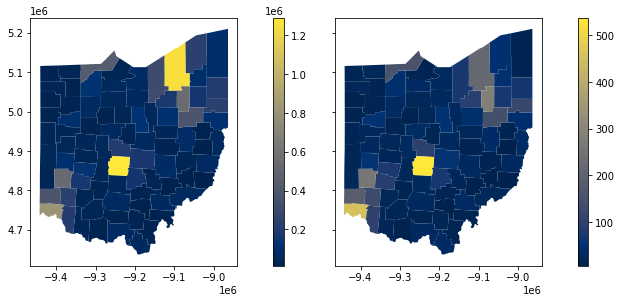

In [173]:
# Calculate Ohio population density and convert to people/square km
ohio['pop_density'] = ohio['B01003_001E'] / (ohio['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

f, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(10,10),sharex=True, sharey=True)

# These two lines make the colorbar the same size as the axes.
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)
cax1 = divider1.append_axes("right", size="5%", pad=0.5)
cax2 = divider2.append_axes("right", size="5%", pad=0.5)

# Plot
ohio.plot('B01003_001E', ax=ax1, cmap='cividis', legend=True, cax=cax1)
ohio.plot('pop_density', ax=ax2, cmap='cividis', legend=True, cax=cax2)

plt.show()

#### The above figures show the population (left, millions of people) and population density (right, population/km<sup>2</sup>) of each Ohio county across the whole state. Note: there is some distortion of the map along the Northern coast because the county lines are being drawn across Lake Erie.

### [**Ohio 2020 Election Results**](https://www.wlwt.com/article/election-2020-ohio-historical-maps-oct-23/34463242)

<div>
<img src="images/OH_2020election.jpg" width="400"/>
</div>

### [**Ohio Electoral College History**](https://www.270towin.com/states/Ohio)
<div>
    
<img src="images/OH_electoralcollege.png" width="400"/>
</div>

#### I wanted to look at this data because I am from Ohio and I wanted to recreate the comparisons I had seen for other states. Ohio is well known around election time as a "swing state" because it does not have a consistent voting history. When we compare the 2019 US Census population data to the electoral college voting pattern from the most recent election, we can see that the regions with the most people and the highest densities of people voted for Biden while those with lower populations and lower population density voted for Trump.